In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
project_name = 'final-project-jovain.ml'

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

from PIL import Image
import pandas as pd

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

from torchvision.utils import make_grid

! pip install jovian --upgrade -q
import jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 950.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
data_dir = "../input/sign-language-mnist/"

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/PIC16B_PROJ/')

# # test_df = pd.read_csv(data_dir+'sign_mnist_test.csv')
# # train_df = pd.read_csv(data_dir+'sign_mnist_train/sign_mnist_train.csv')

Mounted at /content/drive


In [ ]:
test_df = pd.read_csv('sign_mnist_test.csv')
train_df = pd.read_csv('sign_mnist_train.csv')

In [ ]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


Our Data

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import keras
from keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
#import jax.numpy as jnp
#import tensorflow_datasets as tfds
import cv2
from google.colab import drive
import jax
import pandas as pd
jax.devices()
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PIC16B_PROJ/CollectedImages')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:

# Set the path/directory
images = []
labels = []

folder_dir = '/content/drive/My Drive/PIC16B_PROJ/CollectedImages'

# Loop through the subdirectories in the directory
for sub_dir in os.listdir(folder_dir):
    sub_dir_path = os.path.join(folder_dir, sub_dir)

    # Check if the item in the directory is a subdirectory
    if os.path.isdir(sub_dir_path):
        label = int(sub_dir)  # Convert subdirectory name to integer label

        # Loop through the images in the subdirectory
        for filename in os.listdir(sub_dir_path):
            # Check if the file ends with .jpg
            if filename.endswith(".jpg"):
                # Read the image in grayscale
                image_path = os.path.join(sub_dir_path, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Normalize pixel values to the range [0, 255]
                normalized_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

                images.append(normalized_image)
                labels.append(label)

# Convert lists to numpy arrays

images = np.array(images)
labels = np.array(labels)
flattened_images = images.reshape(images.shape[0], -1)


In [1]:
our_df = pd.DataFrame(flattened_images, index=flattened_images[:,0])
our_df

NameError: name 'pd' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
# train is 60%, validation is 20%, test is 20%

# Split data into train and test (80% train, 20% test)
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split train data into train and validation (75% train, 25% validation originally, which is 60% train, 20% validation of original data)
images_train, images_val, labels_train, labels_val = train_test_split(images_train, labels_train, test_size=0.25, random_state=42)

# Verify the shapes of the data splits
print("Training set shape:", images_train.shape)
print("Validation set shape:", images_val.shape)
print("Test set shape:", images_test.shape)


Training set shape: (126, 720, 1280)
Validation set shape: (42, 720, 1280)
Test set shape: (42, 720, 1280)


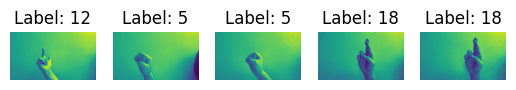

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images you want to visualize
num_images_to_visualize = 5

# Generate random indices to select random images
random_indices = np.random.choice(len(images_test), num_images_to_visualize, replace=False)

# Iterate over random indices and plot images with their labels
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(images_test[idx])
    plt.title("Label: {}".format(labels_test[idx]))
    plt.axis('off')

plt.show()


In [ ]:
our_df = pd.DataFrame(images, index=images[:,0])
our_df

ValueError: Must pass 2-d input. shape=(210, 720, 1280)

In [ ]:
Classes = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
Classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [ ]:
def dataframe_to_nparray(train_df, test_df):
    train_df1 = train_df.copy(deep = True)
    test_df1 = test_df.copy(deep = True)
    train_images = train_df1.iloc[:, 1:].to_numpy(dtype = 'float32')
    test_images = test_df1.iloc[:, 1:].to_numpy(dtype = 'float32')
    return train_images,test_images

In [ ]:
train_img, test_img = dataframe_to_nparray(train_df, test_df)
train_labels = train_df['label'].values
test_labels = test_df['label'].values

In [ ]:
train_img.size

21524720

In [ ]:
train_images_shaped = train_img.reshape(train_img.shape[0],1,28,28)
test_images_shaped = test_img.reshape(test_img.shape[0],1,28,28)

In [ ]:
train_images_tensors = torch.from_numpy(train_images_shaped)
train_labels_tensors = torch.from_numpy(train_labels)

test_images_tensors = torch.from_numpy(test_images_shaped)
test_labels_tensors = torch.from_numpy(test_labels)

In [ ]:
# pytorch dataset
train_ds_full = TensorDataset(train_images_tensors, train_labels_tensors) #this dataset will further devided into validation dataset and training dataset
test_ds = TensorDataset(test_images_tensors, test_labels_tensors)

In [ ]:
img, label = train_ds_full[0]
print(img.shape, label)
img

torch.Size([1, 28, 28]) tensor(3)


tensor([[[107., 118., 127., 134., 139., 143., 146., 150., 153., 156., 158.,
          160., 163., 165., 159., 166., 168., 170., 170., 171., 171., 171.,
          172., 171., 171., 170., 170., 169.],
         [111., 121., 129., 135., 141., 144., 148., 151., 154., 157., 160.,
          163., 164., 170., 119., 152., 171., 171., 170., 171., 172., 172.,
          172., 172., 172., 171., 171., 170.],
         [113., 123., 131., 137., 142., 145., 150., 152., 155., 158., 161.,
          163., 164., 172., 105., 142., 170., 171., 171., 171., 172., 172.,
          173., 173., 172., 171., 171., 171.],
         [116., 125., 133., 139., 143., 146., 151., 153., 156., 159., 162.,
          163., 167., 167.,  95., 144., 171., 172., 172., 172., 172., 172.,
          173., 173., 173., 172., 172., 171.],
         [117., 126., 134., 140., 145., 149., 153., 156., 158., 161., 163.,
          164., 175., 156.,  87., 154., 172., 173., 173., 173., 173., 173.,
          174., 174., 174., 173., 172., 172.],
     

In [ ]:
# Hyperparmeters
batch_size = 64
learning_rate = 0.001

# Other constants
in_channels = 1
input_size = in_channels * 28 * 28
num_classes = 26

In [ ]:
random_seed = 11
torch.manual_seed(random_seed);

In [ ]:
val_size = 7455
train_size = len(train_ds_full) - val_size

train_ds, val_ds = random_split(train_ds_full, [train_size, val_size,])
len(train_ds), len(val_ds), len(test_ds)

(20000, 7455, 7172)

In [ ]:
def show_image(image, label):
    print("Alphabet: ", Classes[label.item()])
    plt.imshow(image.view(28,28))

Alphabet:  M


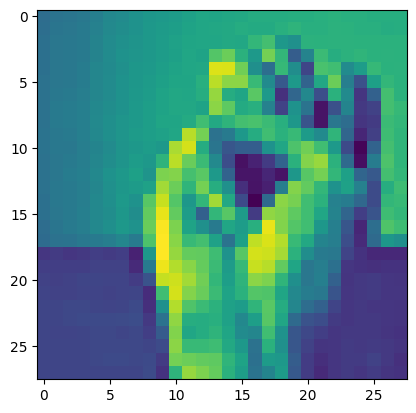

In [ ]:
show_image(*train_ds[8])

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for img, label in train_dl:
    print(img.size())
    break

torch.Size([64, 1, 28, 28])


**CNN**

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ASLBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
class ASLCNNModel(ASLBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(in_channels, 28, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(28, 28, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),     #image size : 28*14*14

            nn.Conv2d(28, 56, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(56, 56, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # image size : 56*7*7

            nn.Flatten(),
            nn.Linear(56*7*7, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, xb):
        return self.network(xb)

In [ ]:
in_channels, num_classes

(1, 26)

In [ ]:
model = ASLCNNModel(in_channels, num_classes)
model

ASLCNNModel(
  (network): Sequential(
    (0): Conv2d(1, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(28, 28, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(28, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(56, 56, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2744, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=128, bias=True)
    (14): ReLU()
    (15): Linear(in_features=128, out_features=26, bias=True)
  )
)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(ASLCNNModel(in_channels, num_classes), device)

In [ ]:
evaluate(model, val_dl)

{'val_loss': 3.3800601959228516, 'val_acc': 0.053512848913669586}

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam

In [ ]:
history = fit(num_epochs, 0.001 , model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.7772, val_loss: 0.0295, val_acc: 0.9930
Epoch [1], train_loss: 0.0195, val_loss: 0.0012, val_acc: 0.9999
Epoch [2], train_loss: 0.0002, val_loss: 0.0000, val_acc: 1.0000
Epoch [3], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [4], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [5], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [6], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [7], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [8], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [9], train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

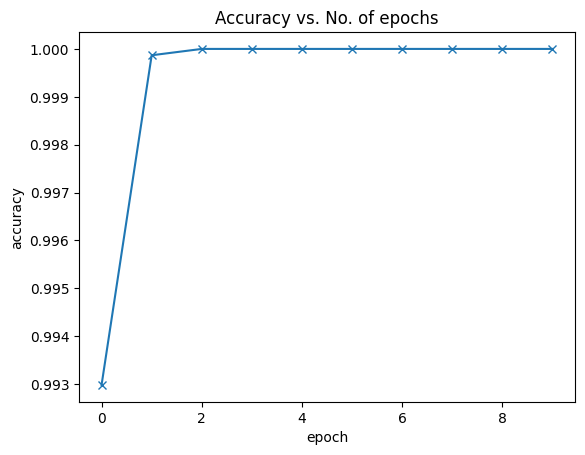

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

testing with images

In [ ]:
# Testing with test dataloader
result = evaluate(model, test_dl)
result

{'val_loss': 0.33478251099586487, 'val_acc': 0.945038378238678}

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return preds[0].item()

Label: tensor(6) , Predicted: 6


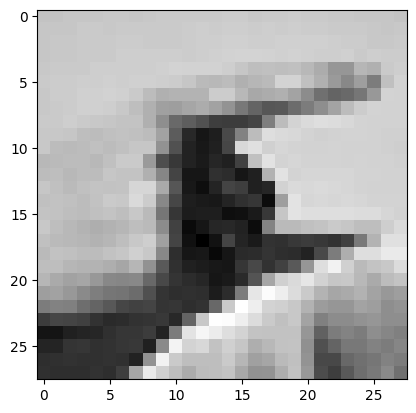

In [ ]:
img, label = test_ds[0]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: tensor(10) , Predicted: 10


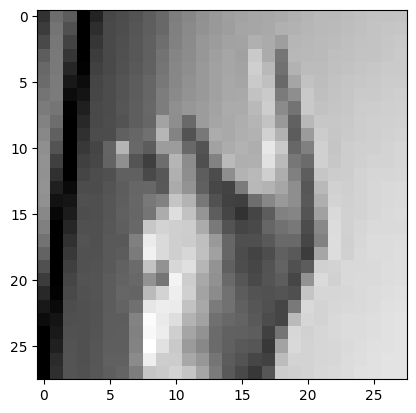

In [ ]:
img, label = test_ds[6762]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: tensor(4) , Predicted: 4


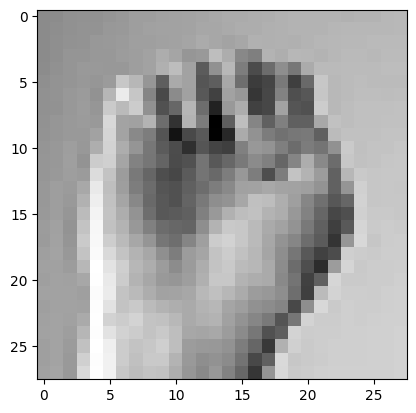

In [ ]:
img, label = test_ds[23]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
torch.save(model.state_dict(), '3-asl-cnn.pth')

In [ ]:
jovian.commit(project= project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


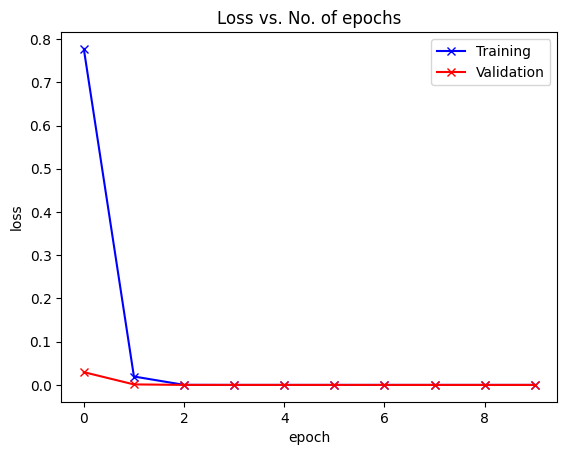

In [ ]:
plot_losses(history)

In [ ]:
class ASLModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, in_channels*28*28)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = ASLModel()

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
for images, labels in test_dl:
    outputs = model(images)
    print(labels)
    print(accuracy(outputs, labels))

    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

tensor([ 6,  5, 10,  0,  3, 21, 10, 14,  3,  7,  8,  8, 21, 12,  7,  4, 22,  0,
         7,  7,  2,  0, 21,  4, 10, 15,  2, 15,  7,  1,  7,  8, 13, 19,  3, 21,
        13,  3, 18, 14, 15, 23,  8, 15, 14,  5, 17,  4, 19, 13, 20, 22, 20,  5,
        16, 16, 21,  4,  7, 22, 10, 13, 11, 22,  2, 10,  1,  4, 18,  4, 20,  6,
        15,  4,  3, 20, 15, 11,  2,  2, 17,  2,  7, 21, 23,  7, 12, 17, 24, 14,
         2,  1,  7, 23,  8,  5,  0,  0, 19, 21,  8,  4,  2, 20, 16,  1, 15, 14,
         2,  6, 12,  5,  0, 24,  2, 19, 14, 24, 16, 10,  4,  8,  8, 12, 12,  8,
         6, 21])
tensor(0.0156)
outputs.shape :  torch.Size([128, 26])
Sample outputs :
 tensor([[  -9.1287,  174.1221,  -77.2216,  -95.7142,  144.9524,    3.6266,
           46.9886,   -8.1659,   39.4832, -203.0898,   11.8661,   13.4114,
           72.5127, -173.3604,   30.5443,   75.9951,   28.7579,  161.9201,
          -72.5889,   87.5930,  135.8189,  140.7298,  -54.1313,   35.7257,
           82.7100,  -40.5799],
        [ -44.4675,

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
result0 = evaluate(model, val_dl)
result0

{'val_loss': 193.77249145507812, 'val_acc': 0.03230932354927063}

In [ ]:
history1 = fit(10, 0.001, model, train_dl, val_dl)

Epoch [0], val_loss: 2704.5005, val_acc: 0.2507
Epoch [1], val_loss: 638.5846, val_acc: 0.4926
Epoch [2], val_loss: 591.1880, val_acc: 0.4415
Epoch [3], val_loss: 271.4000, val_acc: 0.6093
Epoch [4], val_loss: 521.0675, val_acc: 0.5787
Epoch [5], val_loss: 342.5147, val_acc: 0.6297
Epoch [6], val_loss: 169.3584, val_acc: 0.7168
Epoch [7], val_loss: 243.2749, val_acc: 0.6685
Epoch [8], val_loss: 645.2281, val_acc: 0.5687
Epoch [9], val_loss: 383.1360, val_acc: 0.6541


In [ ]:
history2 = fit(10, 0.0001, model, train_dl, val_dl)

Epoch [0], val_loss: 25.0784, val_acc: 0.9154
Epoch [1], val_loss: 23.5602, val_acc: 0.9098
Epoch [2], val_loss: 21.3396, val_acc: 0.9185
Epoch [3], val_loss: 20.2865, val_acc: 0.9245
Epoch [4], val_loss: 19.5798, val_acc: 0.9199
Epoch [5], val_loss: 17.7929, val_acc: 0.9219
Epoch [6], val_loss: 15.7554, val_acc: 0.9302
Epoch [7], val_loss: 15.8324, val_acc: 0.9260
Epoch [8], val_loss: 13.5364, val_acc: 0.9354
Epoch [9], val_loss: 13.2920, val_acc: 0.9318


In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: I , Predicted: I


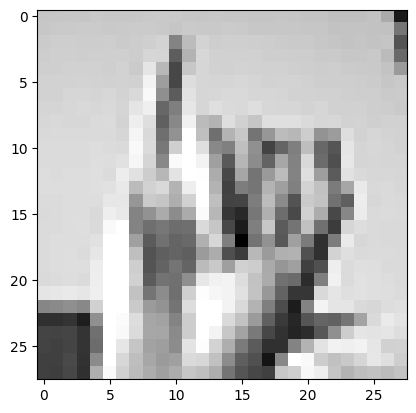

In [ ]:
img, label = test_ds[10]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', Classes[label.item()], ', Predicted:', Classes[predict_image(img, model)])

Label: H , Predicted: H


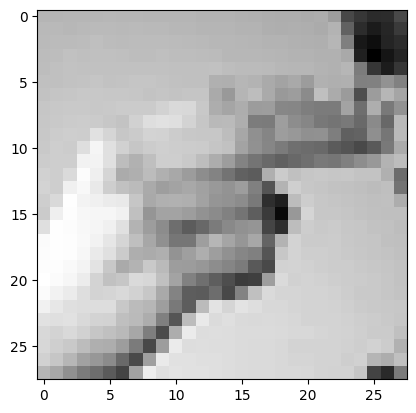

In [ ]:
img, label = test_ds[200]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', Classes[label.item()], ', Predicted:', Classes[predict_image(img, model)])

Label: D , Predicted: D


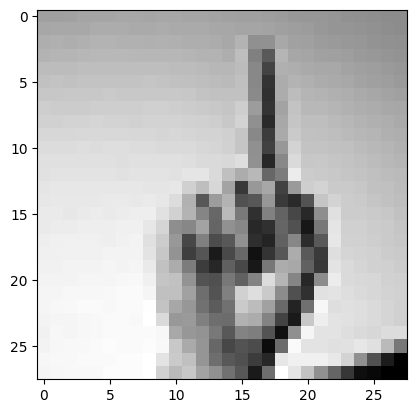

In [ ]:
img, label = test_ds[1000]
plt.imshow(img.view(28,28), cmap='gray')
print('Label:', Classes[label.item()], ', Predicted:', Classes[predict_image(img, model)])

In [ ]:
from torchvision import models
import torch
import cv2 as cv
from google.colab import drive
import os


drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PIC16B_PROJ/CollectedImages/h')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/PIC16B_PROJ/CollectedImages/h'

In [ ]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 144MB/s]


In [ ]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

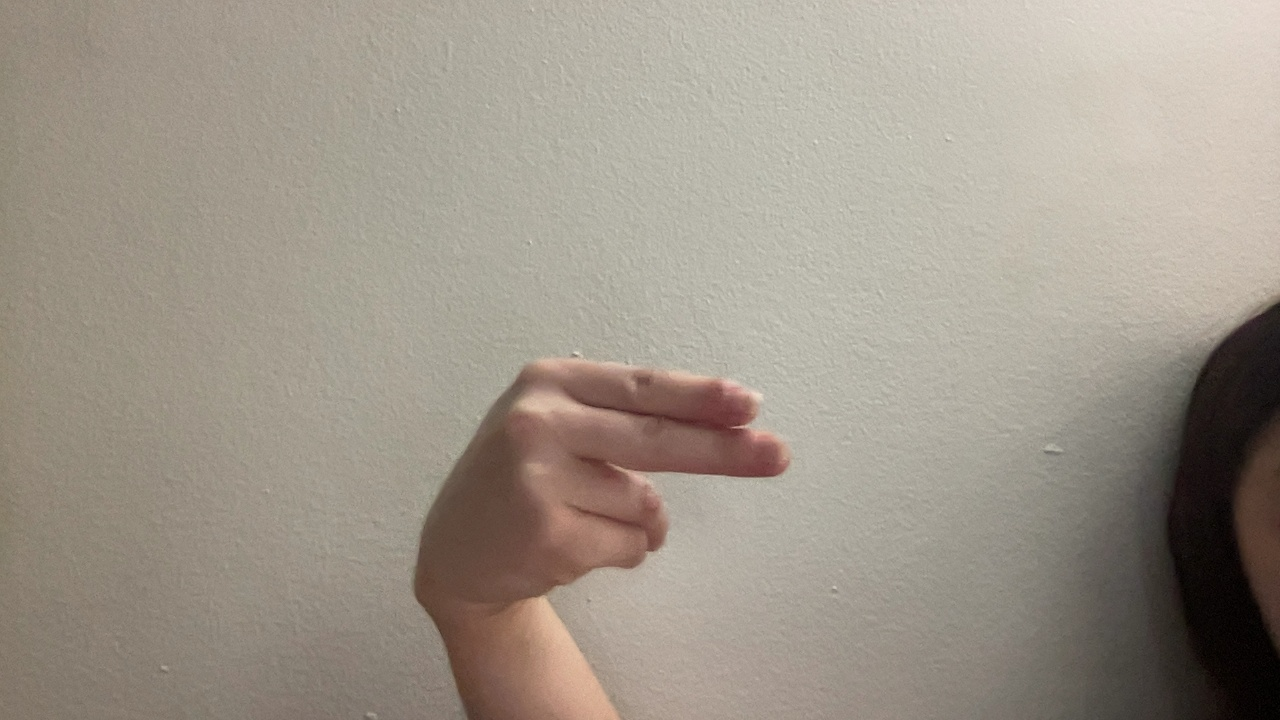

In [ ]:
# h_jpg = cv.imread('h_1da42c70-e0b7-11ee-9ddf-5a6753799e9b.jpg')
# h_jpg

from PIL import Image
img = Image.open("h_1da42c70-e0b7-11ee-9ddf-5a6753799e9b.jpg")
img

In [ ]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [ ]:
import torch
import urllib

# Download the ImageNet class labels file
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
urllib.request.urlretrieve(url, 'imagenet_classes.txt')

# Load class labels
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

print(labels[:5])  # Print first 5 class labels


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


In [ ]:
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

lipstick 12.385663032531738


In [ ]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('lipstick', 12.385663032531738),
 ('Band Aid', 5.999519348144531),
 ('syringe', 4.569592475891113),
 ('ice lolly', 4.2947001457214355),
 ('drumstick', 4.080633640289307)]

#**Image Classification and Transfer Learning**

# Load Packages and Obtain Data

Here we are importing the neccessary packages, as well as utilizing a GPU.

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import keras
from keras import utils, datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import tensorflow_datasets as tfds

In [ ]:
import jax
jax.devices()

[cuda(id=0)]

In [ ]:
!nvidia-smi

Tue Mar  5 06:38:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0              25W /  70W |    105MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Now, we are loading the dataset "cats vs dogs" from tensorflow datasets. We need to split the data into train, validation, and test.

In [ ]:
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # 40% for training, 10% for validation, and 10% for test (the rest unused)
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print(f"Number of training samples: {train_ds.cardinality()}")
print(f"Number of validation samples: {validation_ds.cardinality()}")
print(f"Number of test samples: {test_ds.cardinality()}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteDHWN7C/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


Now, we resize each of the images to a fixed size of 150x150 so that they will all be the same size.

In [ ]:
resize_fn = keras.layers.Resizing(150, 150)

train_ds = train_ds.map(lambda x, y: (resize_fn(x), y))
validation_ds = validation_ds.map(lambda x, y: (resize_fn(x), y))
test_ds = test_ds.map(lambda x, y: (resize_fn(x), y))

This will rapidly read the data.

In [ ]:
from tensorflow import data as tf_data
batch_size = 64

train_ds = train_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
validation_ds = validation_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()
test_ds = test_ds.batch(batch_size).prefetch(tf_data.AUTOTUNE).cache()

# Working with Datasets

Here, we are importing more packages that will be neccessary. Then, we will write a function called visualize(). visualize() will take in the dataset and the number of samples in each row. For now, we only need 3 samples per row. It will take in all of the images and randomly output 3 cat images in one row, then 3 dog images in the second row.

In [ ]:
import random
from tensorflow import data as tf_data

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def visualize(dataset):
  # makes plot of figures
  fig, axes = plt.subplots(2, 3, figsize=(15, 7))

  # loops through each
  shuff_ds = dataset.shuffle(buffer_size=len(dataset))
  for images, labels in shuff_ds.take(1):
      cat_count = 0
      dog_count = 0
      for image, label in zip(images, labels):
          if label == 0 and cat_count < 3:
              axes[0, cat_count].imshow(image.numpy().astype("uint8"))
              axes[0, cat_count].set_title('Cat')
              axes[0, cat_count].axis("off")
              cat_count += 1
          elif label == 1 and dog_count < 3:
              axes[1, dog_count].imshow(image.numpy().astype("uint8"))
              axes[1, dog_count].set_title('Dog')
              axes[1, dog_count].axis("off")
              dog_count += 1
          if cat_count == 3 and dog_count == 3:
              break

  plt.show()

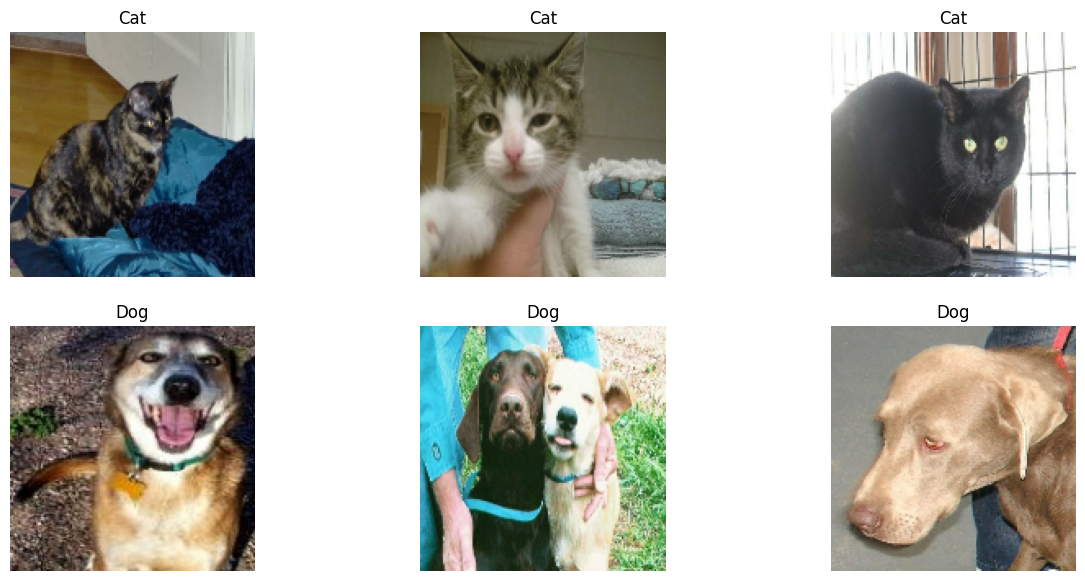

In [ ]:
visualize(train_ds)

# Check Label Frequencies

Now, we need to see how many images of each label exist in the dataset. Cat will correspond to 0, and dog will correspond to 1. The iterator below will organize which is which. Then, we count them all up to print out counts for label 0 images and label 1 images. If the baseline machine learning model is the model that always guesses the most frequent label, then it would not be very helpful in this scenario. Since nearly 50% of the images are cat images, and nearly 50% of the images are dog images, there is about a 50% chance that this model would guess it right. It wouldn't be helpful to us.

In [ ]:
labels_iterator= train_ds.unbatch().map(lambda image, label: label).as_numpy_iterator()

In [ ]:
cat_count = 0
dog_count = 0

for label in labels_iterator:
    if label == 0:  # Cat label
        cat_count += 1
    elif label == 1:  # Dog label
        dog_count += 1

print("Number of images with label 0 (cat):", cat_count)
print("Number of images with label 1 (dog):", dog_count)

Number of images with label 0 (cat): 4637
Number of images with label 1 (dog): 4668


# First Model

Now, we are writing our first model. We are using keras.Sequential to include an input layer, 3 Conv2D layers, 2 MaxPooling2D layers, 1 Flatten layer, 1 Dense layer, and 1 Dropout layer. Below is a summary of how well this model performed in terms of training the data to classify between cats and dogs.

In [ ]:
from keras import datasets, layers, models

model1 = models.Sequential([
    layers.Input((150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10), # number of classes
    layers.Dropout(0.5)
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [ ]:
model1.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model1.fit(train_ds,
                     epochs=20,
                     validation_data=validation_ds)

Epoch 1/20
146/146 [==============================] - 17s 69ms/step - loss: 5.9742 - accuracy: 0.5035 - val_loss: 0.7676 - val_accuracy: 0.5688
Epoch 2/20
146/146 [==============================] - 4s 30ms/step - loss: 1.4610 - accuracy: 0.5353 - val_loss: 0.7122 - val_accuracy: 0.5899
Epoch 3/20
146/146 [==============================] - 4s 29ms/step - loss: 1.3851 - accuracy: 0.5666 - val_loss: 0.7028 - val_accuracy: 0.6376
Epoch 4/20
146/146 [==============================] - 4s 29ms/step - loss: 1.3009 - accuracy: 0.6192 - val_loss: 0.7116 - val_accuracy: 0.6204
Epoch 5/20
146/146 [==============================] - 4s 30ms/step - loss: 1.2610 - accuracy: 0.6387 - val_loss: 0.7069 - val_accuracy: 0.6406
Epoch 6/20
146/146 [==============================] - 4s 29ms/step - loss: 1.2048 - accuracy: 0.6692 - val_loss: 0.7791 - val_accuracy: 0.6414
Epoch 7/20
146/146 [==============================] - 4s 30ms/step - loss: 1.1734 - accuracy: 0.6939 - val_loss: 0.7643 - val_accuracy: 0.649

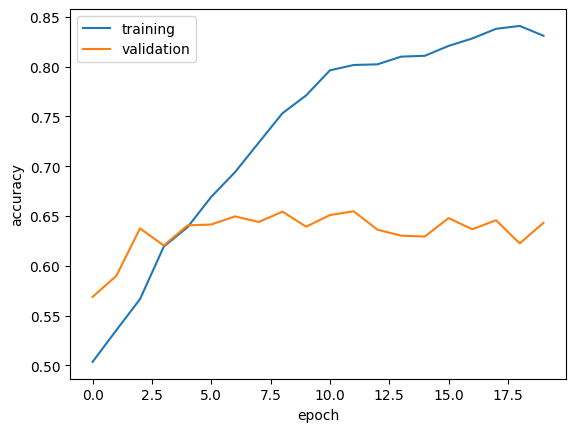

In [ ]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

**The accuracy of my model stabilized between 61% and 69% during training.** This was quite better than the baseline of about 50%, which was wrong half of the time. I experimented with this multiple times to get a better accuracy. The very first time I ran this model, some epochs were at 56% accuracy. We do observe overfitting in model1, as the training accuracy is higher than the validation accuracy in more than half of the epochs.

# Model with Data Augmentation

Our next approach is to use RandomFlip and RandomRotation to include transformed versions of the images so that the model can learn about the invariant features of these images.

In [ ]:
flip_layer = tf.keras.Sequential([layers.RandomFlip("horizontal")])

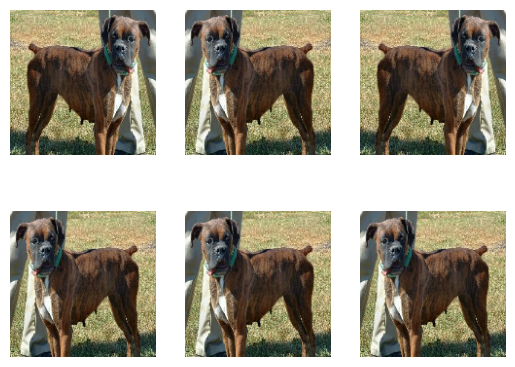

In [ ]:
for image, label in train_ds.take(1):
  og_image = image[0] # set our original image
  for i in range(6): # then we want to apply this random flip layer to the orignal image 6 times
    ax = plt.subplot(2, 3, i + 1)
    flipped_im = flip_layer(tf.expand_dims(og_image, 0))
    plt.imshow(flipped_im[0] / 255)
    plt.axis('off')

In [ ]:
rotate_layer = tf.keras.Sequential([layers.RandomRotation(.2)])

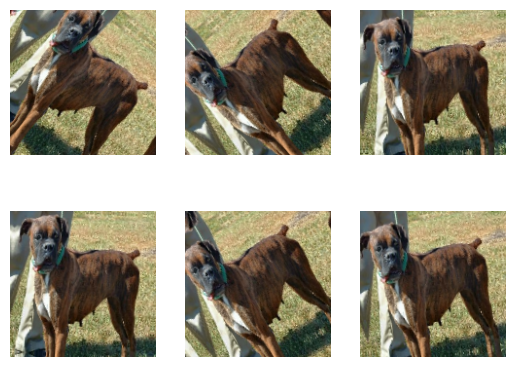

In [ ]:
for image, label in train_ds.take(1):
  og_image = image[0]
  for i in range(6): # very similar code to prev example
    # creates 6 subplots plotting variations of the original image
    ax = plt.subplot(2, 3, i + 1)
    rotated_im = rotate_layer(tf.expand_dims(og_image, 0))
    plt.imshow(rotated_im[0] / 255)
    plt.axis('off')

In [ ]:
# now a new model, with all of the same layers, but adding Random Flip and Rotation as the first two
model2 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.2),
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (160,160,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.2),
    layers.Conv2D(32, (3,3), activation = "relu"),
    layers.GlobalMaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(2)
])

In [ ]:
model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model2.fit(train_ds,
                    epochs = 20,
                    validation_data= (test_ds))

Epoch 1/20
146/146 [==============================] - 11s 64ms/step - loss: 4.1356 - accuracy: 0.5231 - val_loss: 1.6690 - val_accuracy: 0.5198
Epoch 2/20
146/146 [==============================] - 6s 40ms/step - loss: 0.9832 - accuracy: 0.5465 - val_loss: 0.9688 - val_accuracy: 0.5387
Epoch 3/20
146/146 [==============================] - 6s 39ms/step - loss: 0.7909 - accuracy: 0.5657 - val_loss: 0.9152 - val_accuracy: 0.5297
Epoch 4/20
146/146 [==============================] - 6s 38ms/step - loss: 0.7267 - accuracy: 0.5770 - val_loss: 0.9039 - val_accuracy: 0.5318
Epoch 5/20
146/146 [==============================] - 6s 39ms/step - loss: 0.7013 - accuracy: 0.5805 - val_loss: 0.7665 - val_accuracy: 0.5443
Epoch 6/20
146/146 [==============================] - 6s 38ms/step - loss: 0.6717 - accuracy: 0.5970 - val_loss: 0.7565 - val_accuracy: 0.5482
Epoch 7/20
146/146 [==============================] - 6s 39ms/step - loss: 0.6647 - accuracy: 0.6045 - val_loss: 0.7639 - val_accuracy: 0.548

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 150, 150, 3)       0         
 otation)                                                        
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)       

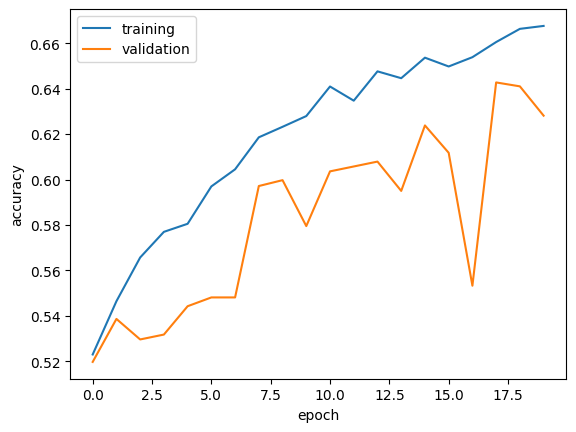

In [ ]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

**The accuracy of my model stabilized between 50% and 65% during training.** Model2 performed slightly worse than Model1 did. There is overfitting once again, as the training accuracy grows higher than the validation accuracy.

# Data Preprocessing

In [ ]:
i = keras.Input(shape=(150, 150, 3))
# The pixel values have the range of (0, 255), but many models will work better if rescaled to (-1, 1.)
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(i)
preprocessor = keras.Model(inputs = [i], outputs = [x])

In [ ]:
model3 = tf.keras.Sequential([
    preprocessor,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.2),
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(.2),
    layers.Conv2D(32, (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(2)
])

In [ ]:
model3.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [ ]:
history = model3.fit(train_ds,
                    epochs =20,
                    validation_data= (test_ds))

Epoch 1/20
146/146 [==============================] - 9s 48ms/step - loss: 0.7421 - accuracy: 0.5731 - val_loss: 0.6295 - val_accuracy: 0.6556
Epoch 2/20
146/146 [==============================] - 7s 47ms/step - loss: 0.6144 - accuracy: 0.6570 - val_loss: 0.5821 - val_accuracy: 0.7064
Epoch 3/20
146/146 [==============================] - 7s 46ms/step - loss: 0.5826 - accuracy: 0.6900 - val_loss: 0.5568 - val_accuracy: 0.7124
Epoch 4/20
146/146 [==============================] - 7s 46ms/step - loss: 0.5559 - accuracy: 0.7114 - val_loss: 0.5217 - val_accuracy: 0.7365
Epoch 5/20
146/146 [==============================] - 7s 46ms/step - loss: 0.5312 - accuracy: 0.7293 - val_loss: 0.4977 - val_accuracy: 0.7524
Epoch 6/20
146/146 [==============================] - 7s 45ms/step - loss: 0.5192 - accuracy: 0.7335 - val_loss: 0.4912 - val_accuracy: 0.7601
Epoch 7/20
146/146 [==============================] - 7s 45ms/step - loss: 0.5074 - accuracy: 0.7457 - val_loss: 0.4736 - val_accuracy: 0.7730

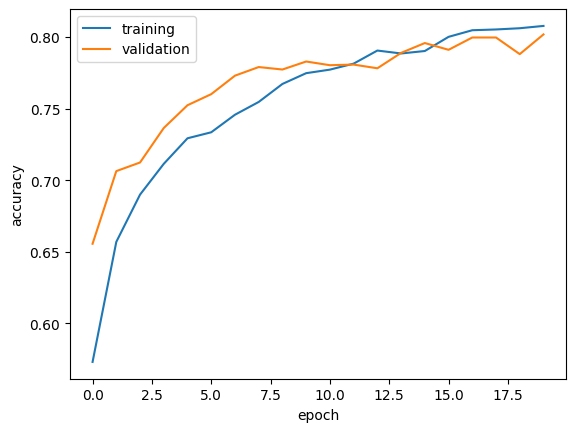

In [ ]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

**The accuracy of my model stabilized between 65% and 79% during training.** Model3 performed much better than Model1 did. There is no overfitting, as the training accuracy does not grow higher than the validation accuracy does.

# Transfer Learning

In [ ]:
IMG_SHAPE = (150, 150, 3)
base_model = keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

i = keras.Input(shape=IMG_SHAPE)
x = base_model(i, training = False)
base_model_layer = keras.Model(inputs = i, outputs = x)

12683000/12683000 [==============================] - 2s 0us/step


In [ ]:
model4 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(.2),
    base_model_layer,
    layers.GlobalMaxPooling2D(),
    layers.Dropout(.2),
    layers.Dense(2)
])

In [ ]:
model4.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [ ]:
history = model4.fit(train_ds,
                    epochs =20,
                    validation_data= (test_ds))

Epoch 1/20
146/146 [==============================] - 15s 61ms/step - loss: 1.2371 - accuracy: 0.8684 - val_loss: 0.5089 - val_accuracy: 0.9445
Epoch 2/20
146/146 [==============================] - 6s 42ms/step - loss: 0.6414 - accuracy: 0.9178 - val_loss: 0.2986 - val_accuracy: 0.9600
Epoch 3/20
146/146 [==============================] - 6s 43ms/step - loss: 0.5938 - accuracy: 0.9228 - val_loss: 0.2833 - val_accuracy: 0.9617
Epoch 4/20
146/146 [==============================] - 6s 42ms/step - loss: 0.4636 - accuracy: 0.9328 - val_loss: 0.3007 - val_accuracy: 0.9566
Epoch 5/20
146/146 [==============================] - 6s 42ms/step - loss: 0.4020 - accuracy: 0.9328 - val_loss: 0.2278 - val_accuracy: 0.9613
Epoch 6/20
146/146 [==============================] - 6s 43ms/step - loss: 0.3678 - accuracy: 0.9320 - val_loss: 0.2578 - val_accuracy: 0.9592
Epoch 7/20
146/146 [==============================] - 6s 42ms/step - loss: 0.3601 - accuracy: 0.9346 - val_loss: 0.1698 - val_accuracy: 0.968

In [ ]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_3 (RandomR  (None, 150, 150, 3)       0         
 otation)                                                        
                                                                 
 model_1 (Functional)        (None, 5, 5, 960)         2996352   
                                                                 
 global_max_pooling2d_1 (Gl  (None, 960)               0         
 obalMaxPooling2D)                                               
                                                                 
 dropout_3 (Dropout)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                

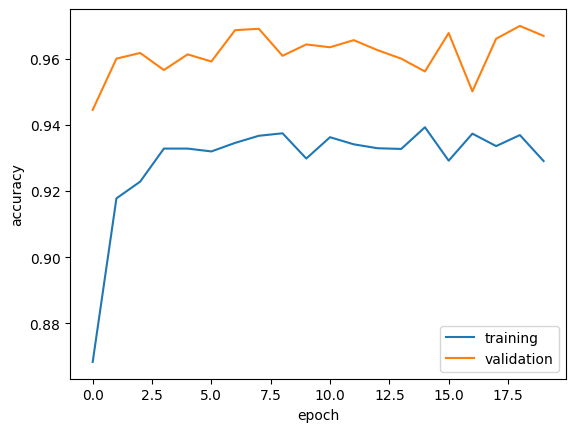

In [ ]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

**The accuracy of my model stabilized between 97% and 96% during training.** Model4's validation accuracy is very high compared to the other models, meaning that it is able to classify cat vs dog much better. There is no overfitting, as the training accuracy does not grow higher than the validation accuracy does.

# Score on Test Data

In [ ]:
model4.evaluate(test_ds)

37/37 [==============================] - 1s 32ms/step - loss: 0.1641 - accuracy: 0.9669


[0.16406741738319397, 0.9668959379196167]

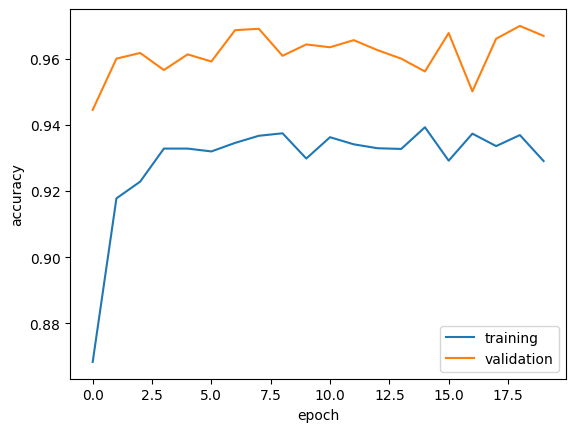

In [ ]:
plt.plot(history.history["accuracy"], label = "training")
plt.plot(history.history["val_accuracy"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "accuracy")
plt.legend()

model4 performed the best, with an accuracy of about 96%.